# Univariate Data Analyses - NHANES Case Study
---

This notebook demonstrates using `Pandas` to perform basic analyses with univariate data, using 2015-2016 wave of NHANES cross-sectional study to illustrate the techniques.

In [ ]:
# importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Next, the NHANES data is loaded from a file into a Pandas dataframe.

In [ ]:
df = pd.read_csv("/content/nhanes_2015_2016.csv")

## Frequency Tables

The `value_counts` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.

In statistical terminology, this is the `frequency distribution` of the variable. Below, frequency distribution of the `DMDEDUC2` variable is shown, which is a variable that reflects a person's level of educational attainment.

The `value_counts` method produces a table with two columns. The first column contains all distinct observed values for the variable. The second column contains the number of times that each of these values occurs.

Note that the table returned by `value_counts` is actually a Pandas `data frame`, so it can be further processed using any Pandas methods for working with data frames.

The numbers `1, 2, 3, 4, 5, 9` seen below are integer codes for the 6 possible non-missing values of the `DMDEDUC2` variable.

This table shows, for example, that 1621 people in the data file have DMDEDUC=4, which indicates that the person has completed some college, but has not graduated with a four-year degree.

In [ ]:
df['DMDEDUC2'].value_counts()

,count
DMDEDUC2,
4.0,1621
5.0,1366
3.0,1186
1.0,655
2.0,643
9.0,3


**NOTE**: The `value_counts` method excludes missing values. This can be confirmed by adding up the number of observations with a `DMDEDUC2` value equal to `1, 2, 3, 4, 5, or 9` (there are 5474 such rows), and comparing this to the total number of rows in the data set, which is 5735.

This tells that there are 5735 - 5474 = 261 missing values for this variable.

In [ ]:
count_of_variable = df["DMDEDUC2"].value_counts().sum()
total_rows = df.shape[0]

if count_of_variable == total_rows:
  print("Frequency Count: {} | Total Count: {}\nNo Values Missing".format(count_of_variable, total_rows))
elif count_of_variable != total_rows:
  print("Frequency Count: {} | Total Count: {}\n{} Values Missing".format(count_of_variable, total_rows, total_rows - count_of_variable))


Frequency Count: 5474 | Total Count: 5735
261 Values Missing


Another way to obtain this result is to locate all the null (missing) values in the data set using the `isnull` Pandas function, and count the number of such locations.

In [ ]:
pd.isnull(df["DMDEDUC2"]).sum()

np.int64(261)

In some cases, it is useful to `replace` integer codes with a text label that reflects the code's meaning.

Below, a new variable called `DMDEDUC2x` is created that records text labels.

In [ ]:
df["DMDEDUC2x"] = df["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})

df["DMDEDUC2x"].value_counts()

,count
DMDEDUC2x,
Some college/AA,1621
College,1366
HS/GED,1186
<9,655
9-11,643
Don't know,3


Similarly, a relabeled version of the gender variable can be created. The convention to be followed will be appending an `x` to the end of a categorical variable's name when it has been recorded from numeric to string (text) values.

In [ ]:
df["RIAGENDRx"] = df["RIAGENDR"].replace({1: "Male", 2: "Female"})

In [ ]:
df["RIAGENDRx"].value_counts()

,count
RIAGENDRx,
Female,2976
Male,2759


For many purposes, it is relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category. This can be done as follows:

In [ ]:
education_value_count = df["DMDEDUC2x"].value_counts()

education_value_count / education_value_count.sum()

,count
DMDEDUC2x,
Some college/AA,0.296127
College,0.249543
HS/GED,0.216661
<9,0.119657
9-11,0.117464
Don't know,0.000548


According to the results above, 12% of the people with non-missing education value have completed less than 9 years of formal education.

In some cases, the missing response category might need to be treated as another category of observed response, rather than being ignored when creating summaries.

Below, a new category called **Missing** is created and assigned all missing values to is using `fillna`. The frequency distribution is recalculated.

In [ ]:
df["DMDEDUC2x"] = df["DMDEDUC2x"].fillna("Missing")

education_value_count = df["DMDEDUC2x"].value_counts()
education_value_count / education_value_count.sum()

,count
DMDEDUC2x,
Some college/AA,0.282650
College,0.238187
HS/GED,0.206800
<9,0.114211
9-11,0.112119
Missing,0.045510
Don't know,0.000523


The recalculated frequency shows that 4.6% of responses are missing.

The percentange of responses with less than 9 years of education drops to 11.4%

## Numerical Summaries

A quick way to get a set of numerical summaries for a quantitative variable is with the `describe` data frame method.

In the codeblock below, numerical summaries for the variable `BMXWT` is shown. Missing values are explicitly dropped using the `dropna` method before the summaries are generated.

In [ ]:
df['BMXWT'].dropna().describe()

,BMXWT
count,5666.000000
mean,81.342676
std,21.764409
min,32.400000
25%,65.900000
50%,78.200000
75%,92.700000
max,198.900000


It is also possible to calculate individual summary statistics from one column of a data set. This can be done using Pandas methods, or with numpy functions.

In [ ]:
# extracting all non-missing values of BMXWT
body_wt = df["BMXWT"].dropna()
# mean using pandas method
print("Body weight mean using pandas method: {}".format(body_wt.mean()))
# mean using numpy function
print("Body weight mean using numpy function: {}\n".format(np.mean(body_wt)))

# median and 75th percentile using pandas method
print("Body weight median using pandas method: {}".format(body_wt.median()))
print("Body weight 75% using pandas method: {}\n".format(body_wt.quantile(0.75)))

# median and 75th percentile using numpy function
print("Body weight median using numpy: {}".format(np.percentile(body_wt, 50)))
print("Body weight 75% using numpy: {}".format(np.percentile(body_wt, 75)))


Body weight mean using pandas method: 81.34267560889516
Body weight mean using numpy function: 81.34267560889516

Body weight median using pandas method: 78.2
Body weight 75% using pandas method: 92.7

Body weight median using numpy: 78.2
Body weight 75% using numpy: 92.7


Next we look at frequencies for a systolic blood pressure measurement `BPXSY1`.

"BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89.

Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.

In [ ]:
systol_first = np.mean((df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139))
systol_second = np.mean((df["BPXSY2"] >= 120) & (df["BPXSY2"] <= 139))

print("Pre-hypertension proportion first systolic measurement: {} \nPre-hypertension proportion second systolic measurement: {}".format(systol_first, systol_second))

Pre-hypertension proportion first systolic measurement: 0.366870095902354 
Pre-hypertension proportion second systolic measurement: 0.37210113339145595


Next, we calculate the proportion of subjects who are pre-hypertensive based on diastolic blood pressure.

In [ ]:
dia_first = np.mean((df["BPXDI1"] >= 80) & (df["BPXDI1"] <= 89))
dia_second = np.mean((df["BPXDI2"] >= 80) & (df["BPXDI2"] <= 89))

print("Pre-hypertension proportion first diastolic measurement: {} \nPre-hypertension proportion second diastolic measurement: {}".format(dia_first, dia_second))

Pre-hypertension proportion first diastolic measurement: 0.14699215344376634 
Pre-hypertension proportion second diastolic measurement: 0.13670444638186574


Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above.

The combined systolic and diastolic condition for pre-hypertension is somewhat complex, so below we construct temporary variables 'systol' and 'diastol' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [ ]:
systol = (df["BPXSY1"] >= 120) & (df["BPXSY1"] <= 139)
diastol = (df["BPXDI1"] >= 80) & (df["BPXDI1"] <= 89)
print("Proportion of subjects with pre-hypertension based on systolic and diastolic measurement: {}".format(np.mean(systol | diastol)))

Proportion of subjects with pre-hypertension based on systolic and diastolic measurement: 0.43173496076721884


Blood pressure measurements are affected by a phenomenon called **white coat hypertension**, in which a subject's blood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence.

In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking at the mean difference between the first two systolic or diastolic blood pressure measurements.

In [ ]:
print("Difference in systolic measurement: {}".format(np.mean(df["BPXSY1"] - df["BPXSY2"])))
print("Difference in diastolic measurement: {}".format(np.mean(df["BPXSY1"] - df["BPXSY2"])))

Difference in systolic measurement: 0.6749860309182343


The mean differences are positive. The first systolic blood pressure measurement is around 0.67 mm Hg greater than the second systolic blood pressure measurement, and the first diastolic blood pressure measurement is around 0.35 mm Hg greater than the second diastolic measurement.

## Graphical Summaries

Quantitative variables can be effectively summarised graphically. In the codeblock below, the body weight is shown as a histogram.

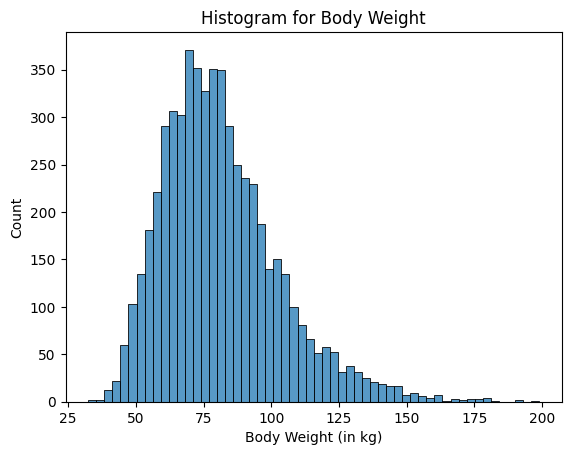

In [ ]:
sns.histplot(df["BMXWT"].dropna())
plt.title("Histogram for Body Weight")
plt.xlabel("Body Weight (in kg)");

Next, the histogram of systolic blood pressure measurements is plotted.

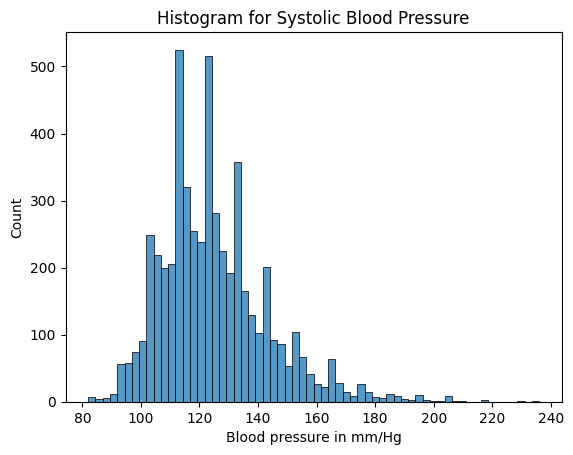

In [ ]:
sns.histplot(df["BPXSY1"].dropna())
plt.title("Histogram for Systolic Blood Pressure")
plt.xlabel("Blood pressure in mm/Hg");

To compare several distributions, boxplots can be plotted side-by-side.

Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements (BPXDI1, BPXDI2).

As expected, diastolic measurements are substantially lower than systolic measurements. Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement. This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

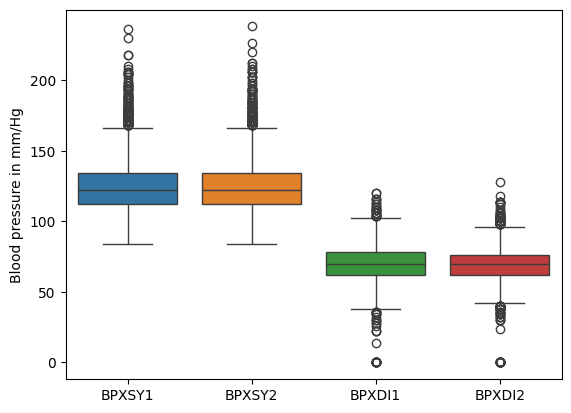

In [ ]:
sns.boxplot(data = df.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]].dropna())
plt.ylabel("Blood pressure in mm/Hg");

## Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these `strata` on its own.

We can then formally or informally compare the findings in the different strata. When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

To illustrate this technique, consider blood pressure, which is a value that tends to increase with age.

To see this trend in the NHANES data, we can partition the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum. Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data. Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

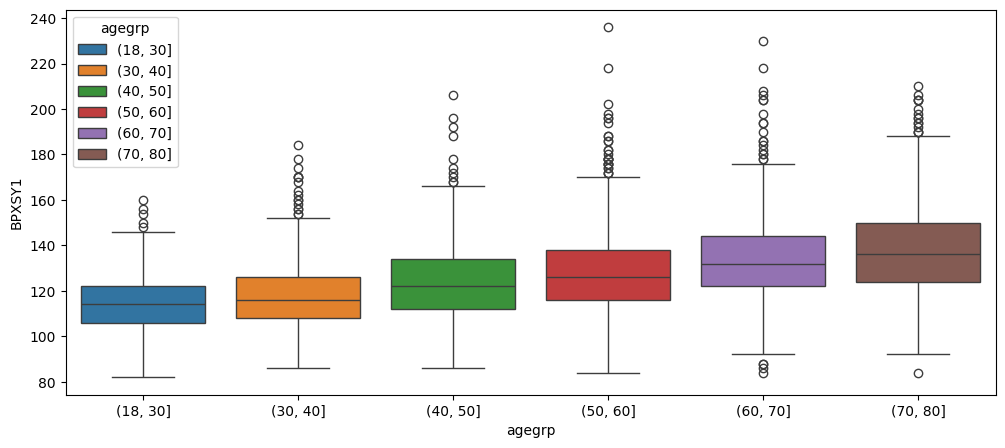

In [ ]:
# creating age strata based on the mentioned cut points
df["agegrp"] = pd.cut(df["RIDAGEYR"], [18, 30, 40, 50, 60, 70, 80])

# making width of the plot wider
plt.figure(figsize = (12, 5))

sns.boxplot(x = df['agegrp'], y = df["BPXSY1"], hue = df["agegrp"]);

The plot above clearly shows the tendency of systolic blood pressure to increase with age. Taking this a step further, it is also the case that blood pressure tends to differ between women and men. While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure. Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people. However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

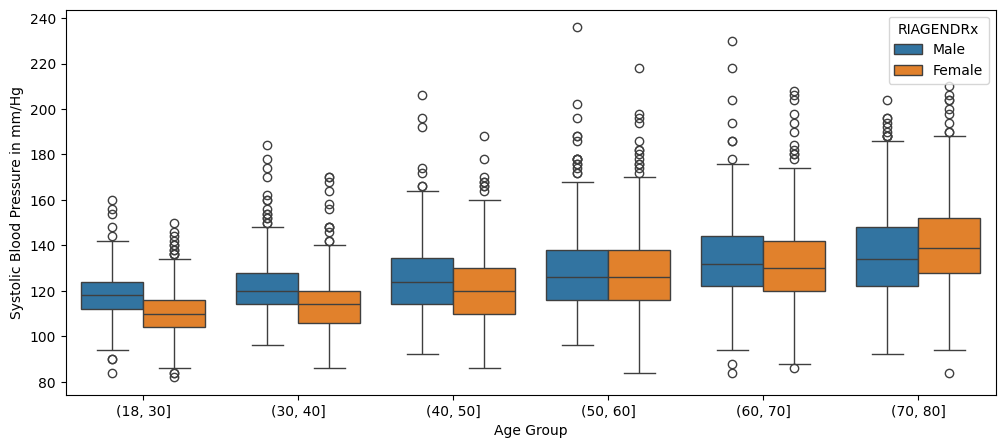

In [ ]:
plt.figure(figsize = (12, 5))

sns.boxplot(x = df['agegrp'], y = df['BPXSY1'], hue = df['RIAGENDRx']);
plt.xlabel("Age Group")
plt.ylabel("Systolic Blood Pressure in mm/Hg");

When stratifying on two factors (here age and gender), the boxes can be first grouped by age, and within age bands, by gender, as done above.

Another way of grouping will be grouping by gender first, and then within gender group, grouping by age bands. Each approach highlights a different aspect of the data.

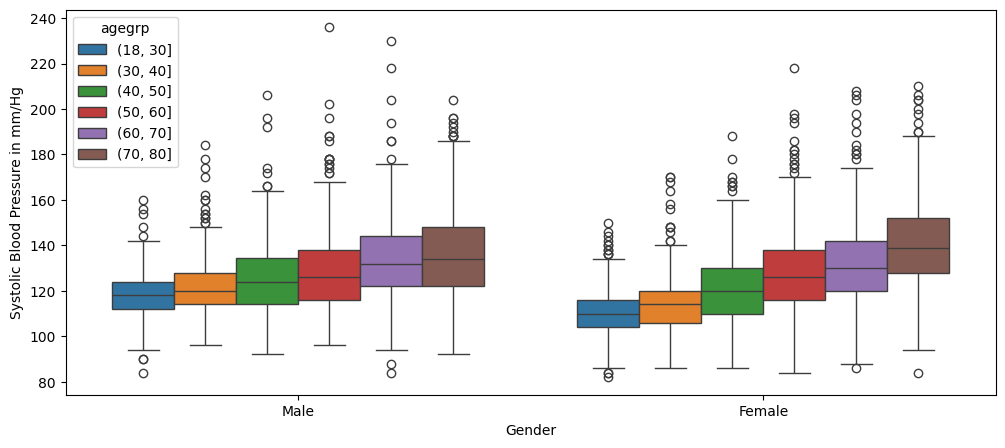

In [ ]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = df["RIAGENDRx"], y = df["BPXSY1"], hue = df["agegrp"])
plt.xlabel("Gender")
plt.ylabel("Systolic Blood Pressure in mm/Hg");

Stratification can also be useful when working with categorical variables. Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands. While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates.

**Note on causality and confounding**: An important role of statistics is to aid researchers in identifying causes underlying observed differences. Here we have seen differences in both blood pressure and educational attainment based on age. It is plausible that aging directly causes blood pressure to increase. But in the case of educational attainment, this is actually a "birth cohort effect". NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later. Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past. Therefore, younger people as a group have higher educational attainment than older people as a group. As these young people grow older, the cross sectional relationship between age and educational attainment will change.

In [ ]:
df.groupby("agegrp")["DMDEDUC2x"].value_counts()

<ipython-input-50-520d44a62f4e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("agegrp")["DMDEDUC2x"].value_counts()


agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
          Don't know           0
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
          Don't know           0
          Missing              0
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
          Don't know           0
          Missing              0
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
          Don't know           0
          Missing              0
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
          Don't know           0
          Missing              0
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College            156
          9-11                88
          Don't know           3
          Missing              0
Name: count, dtype: int64

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously.

In doing this, it is easier to interpret the results if we pivot the education levels into the columns, and normalize the counts so that they sum to 1.

After doing this, the results can be interpreted as proportions or probabilities. One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [ ]:
modified_df = df.loc[~df["DMDEDUC2x"].isin(["Don't know", "Missing"]), :]

modified_df = modified_df.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
modified_df = modified_df.value_counts()

# restructing the results from 'long' to 'wide'
modified_df = modified_df.unstack()
modified_df = modified_df.apply(lambda x: x/x.sum(), axis = 1)

print(modified_df.to_string(float_format="%.3f"));

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255


<ipython-input-53-de98233df5b5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modified_df = modified_df.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
